# This program will examine the different factors that are related to a student's test score. 

In [9]:
import os
import pandas as pd
from StudentsPerformance import StudentsPerformance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# Creating the data frame
students=pd.read_csv(os.path.join(os.getcwd(), "StudentsPerformance.csv"))

#Averaging the scores
avgScores=pd.concat([students["math score"], students["reading score"], students["writing score"]], axis=1)
students = students.drop(["math score", "reading score", "writing score"], axis = 1)
students['mean'] = avgScores.mean(axis=1)

#One-Hot encoding the categorical variables
categoricalVariables = list(students.columns)[:5]
for CV in categoricalVariables:
    dummies = pd.get_dummies(students[CV])
    students = students.drop(CV, axis = 1)
    students = students.join(dummies)

#Categorizing the response variable
def gradeAssign(data):
    if data["mean"] >= 60:
        return "Passed"
    return "Failed"

#Creating a binary classification from the average grade.
students["grade"] = students.apply(gradeAssign, axis = 1)
students = students.drop(["mean"], axis=1)

## The first thing we will do is examine how different classification algorithms perform. 
## Furthermore, since there are 17 features after one hot encoding the categorical variables, we will perform feature reduction using Pricipal Component Analysis (PCA) and determine how many principal components work best for each algorithm.

In [3]:
X,y = students[students.columns[:-1]], students[students.columns[-1]]
classifiers = {"K Nearest Neighbors": KNeighborsClassifier(n_neighbors = 23), "Logistic Regression": LogisticRegression(penalty = "none"), 
              "Support Vector Classification": SVC(probability = True), "Gaussian Naive Bayes": GaussianNB(),
               "Decision Trees": DecisionTreeClassifier(ccp_alpha = .001, max_features = "sqrt"),
               "Random Forests": RandomForestClassifier(ccp_alpha = .0001)}

SP = StudentsPerformance()
for classifier in classifiers:
    SP.ClassifierComparison(X,y,classifier, classifiers[classifier])

K Nearest Neighbors works best with 2 principal components with an average accuracy of 73.1
Logistic Regression works best with 8 principal components with an average accuracy of 73.8
Support Vector Classification works best with 5 principal components with an average accuracy of 72.9
Gaussian Naive Bayes works best with 8 principal components with an average accuracy of 73.9
Decision Trees works best with 15 principal components with an average accuracy of 71.0
Random Forests works best with 15 principal components with an average accuracy of 69.7


## Let's take a look at the performance of each algorithm in depth.

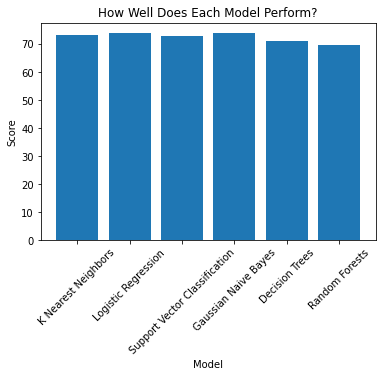

In [4]:
SP.graphComparisons()

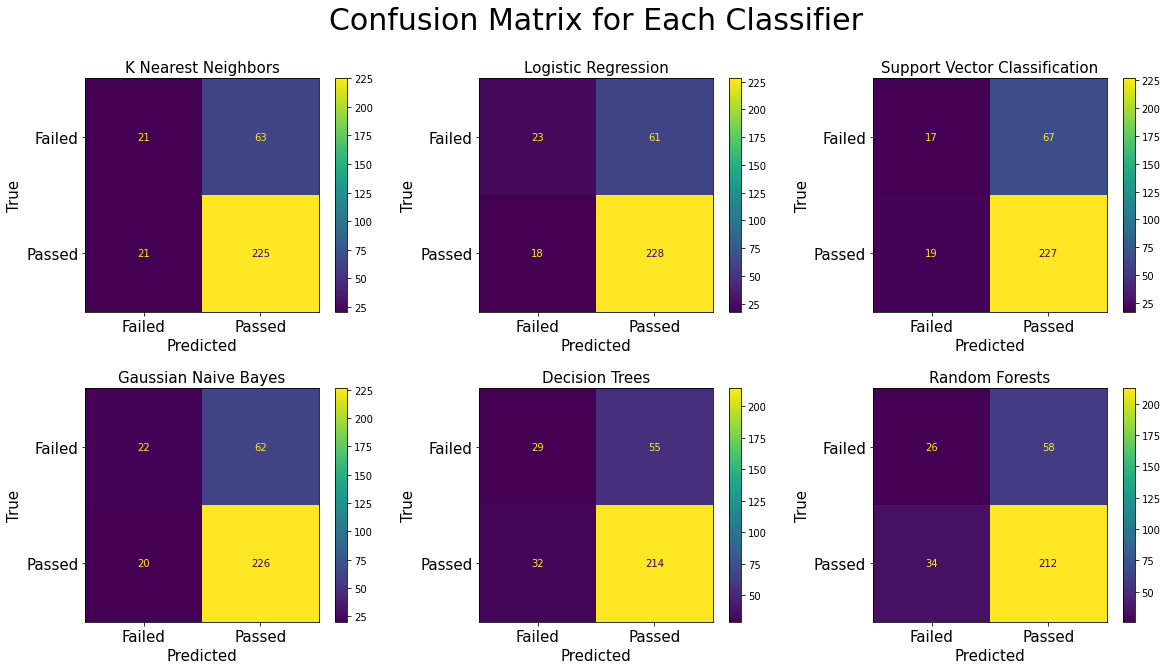

In [5]:
CM = SP.confusionMatrix(X,y)

In [31]:
SP.confusionMatrix_metrics()

Confusion Matrix Merics
TPR for K Nearest Neighbors: 91.46
FPR for K Nearest Neighbors: 75.0
TNR for K Nearest Neighbors: 25.0
FNR for K Nearest Neighbors: 8.54

TPR for Logistic Regression: 92.68
FPR for Logistic Regression: 72.62
TNR for Logistic Regression: 27.38
FNR for Logistic Regression: 7.32

TPR for Support Vector Classification: 92.28
FPR for Support Vector Classification: 79.76
TNR for Support Vector Classification: 20.24
FNR for Support Vector Classification: 7.72

TPR for Gaussian Naive Bayes: 91.87
FPR for Gaussian Naive Bayes: 73.81
TNR for Gaussian Naive Bayes: 26.19
FNR for Gaussian Naive Bayes: 8.13

TPR for Decision Trees: 86.99
FPR for Decision Trees: 65.48
TNR for Decision Trees: 34.52
FNR for Decision Trees: 13.01

TPR for Random Forests: 86.18
FPR for Random Forests: 69.05
TNR for Random Forests: 30.95
FNR for Random Forests: 13.82



## To increase the accuracy, we can utilize the power of ensemble learning. Instead of relying on any single algorithm alone, we can use a combination of classification algorithms to determine each classification. For each classification, if the algorithms produce different answers, the answer with the most support is chosen. Support is based on weighted votes, so the higher the accuracy a classifier has, the more its vote weighs. The classification with the most votes is selected as the final answer.

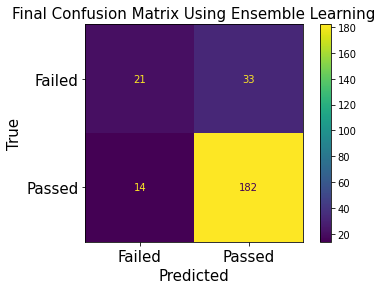

The best ensemble is ('K Nearest Neighbors', 'Logistic Regression', 'Support Vector Classification', 'Gaussian Naive Bayes', 'Decision Trees', 'Random Forests')
Final Accuracy: 81.2 %


In [160]:
SP.ensemble(X,y)
